In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Exploratory Data Analysis**

In [4]:
#  Indicates the rows and columns ofDataFrame!
df.shape

(11162, 17)

In [5]:
# to retrieve the column labels of a DataFrame
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
# descriptive statistics of the data frame (columns with data type 'object')
print(df.describe(include=['object']))

               job  marital  education default housing   loan   contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        month poutcome deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873  


In [8]:
# descriptive statistics of the data frame (columns with data type 'int64')
print(df.describe(include=['int64']))

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum().sum()

0

In [11]:
# gives insights of the distribution of values for each feature in your DataFrame
features=["age","job","marital","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","deposit"]
for i in features:
    print(df[i].value_counts(),i)
    print('='*100)
    

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64 age
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 job
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 marital
no     10994
yes      168
Name: default, dtype: int64 default
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64 balance
no     5881
yes    5281
Name: housing, dtype: int64 housing
no     9702
yes    1460
Name: loan, dtype: int64 loan
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64 contact
20    570
18

**VISUALIZATION**
&
**INSIGHTS**

In [12]:
# Numerical features
numerical_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Categorical features
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# target_variable
target_variable=['deposit']

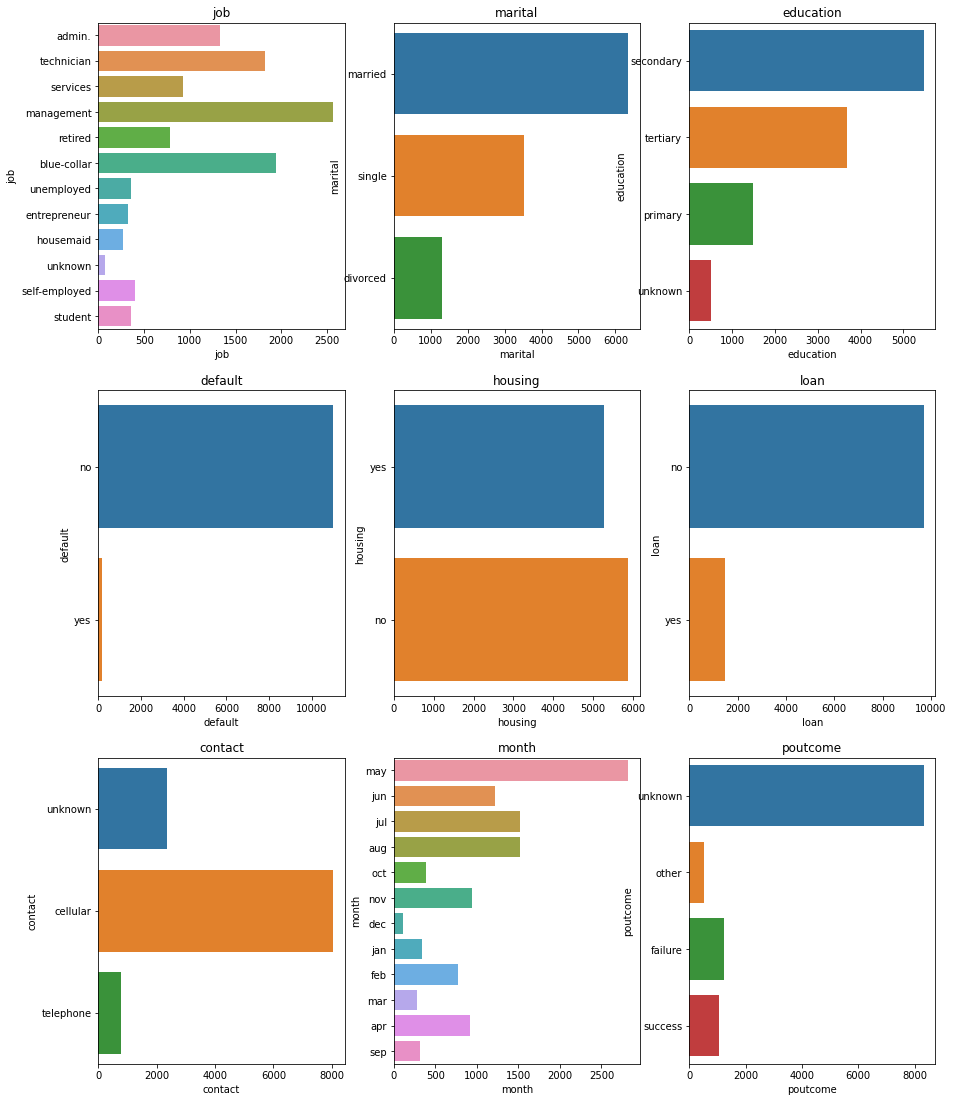

In [13]:
plt.figure(figsize=(15,80))
plotnumber=1
for i in categorical_features: #iterates through each categorical feature
    ax = plt.subplot(12,3,plotnumber) #creates a separate count plot for each.
    sns.countplot(y=i,data=df)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()
# Each plot shows the distribution of the "deposit" variable within that specific category of the chosen feature.

**Categorical Features and Label**

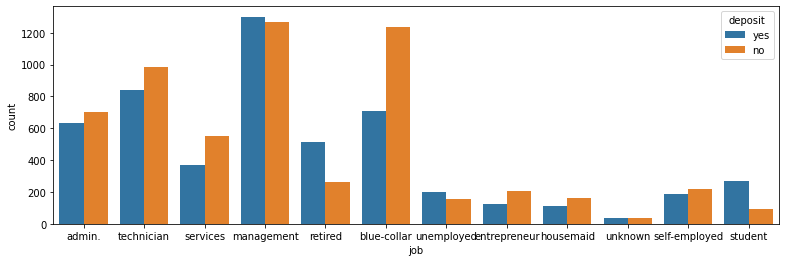

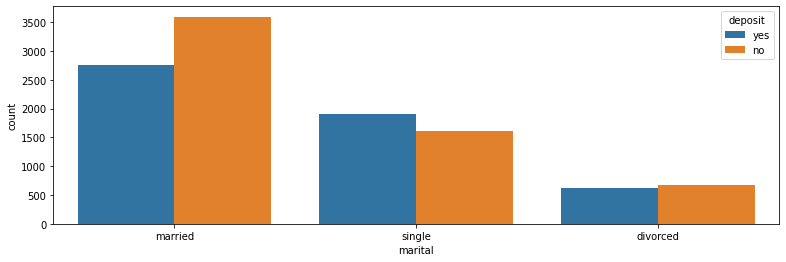

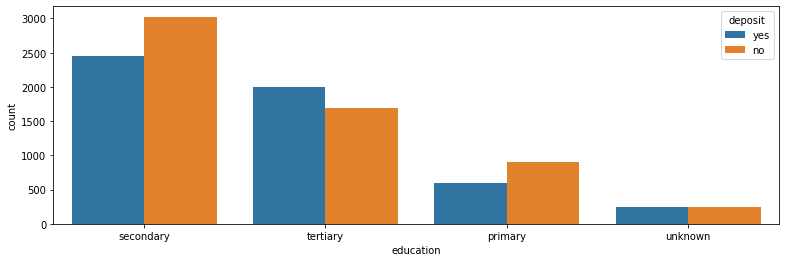

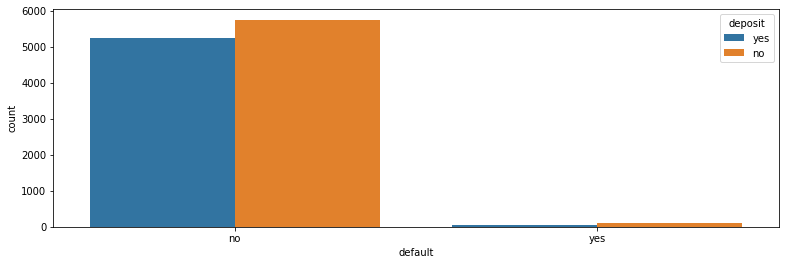

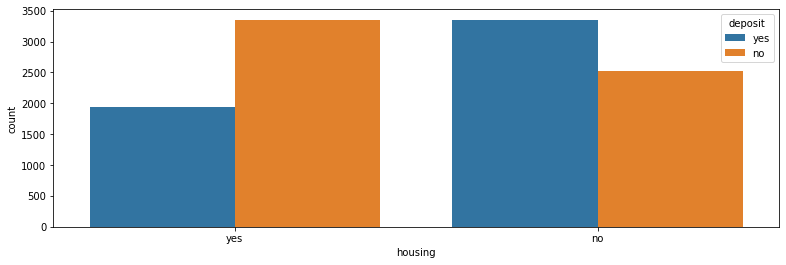

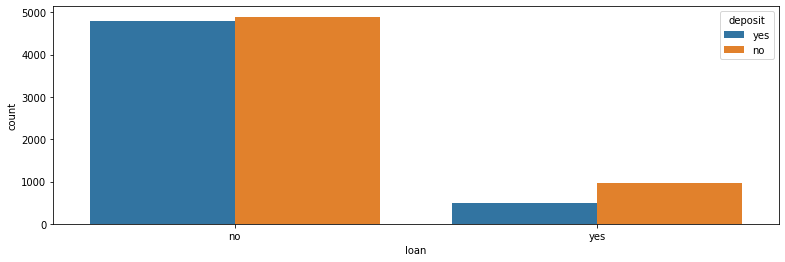

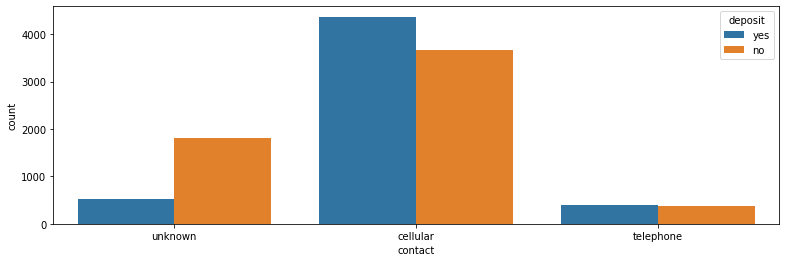

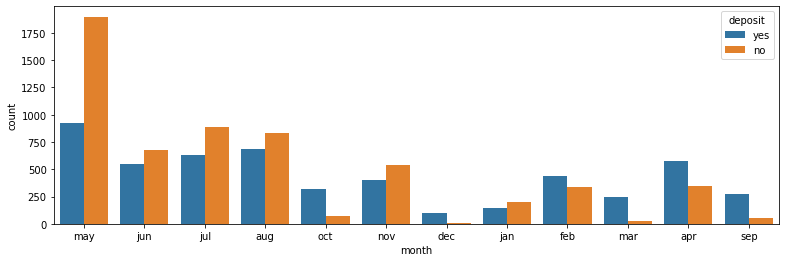

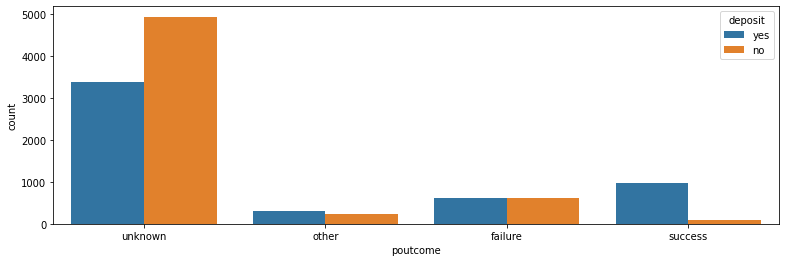

In [14]:
for feature in categorical_features: #iterates over each categorical feature in the categorical_features list
    plt.figure(figsize=(13,4))
    sns.countplot(x=feature, hue="deposit", data= df) #hue parameter separates the counts by the "deposit"
    plt.show()

**Numerical Features**

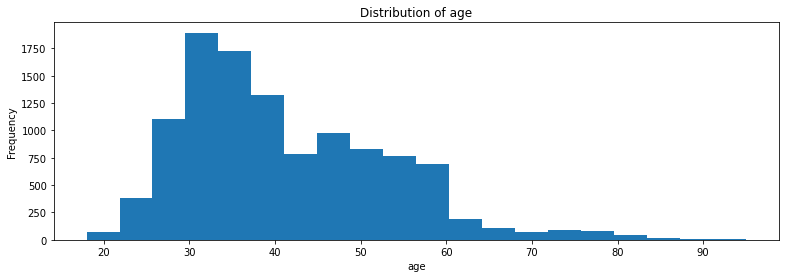

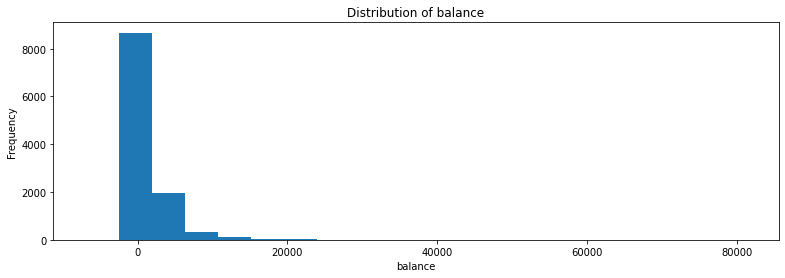

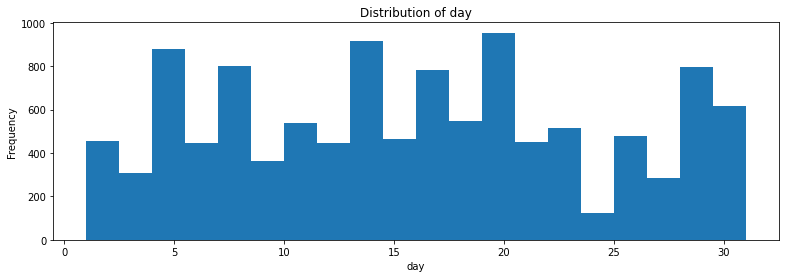

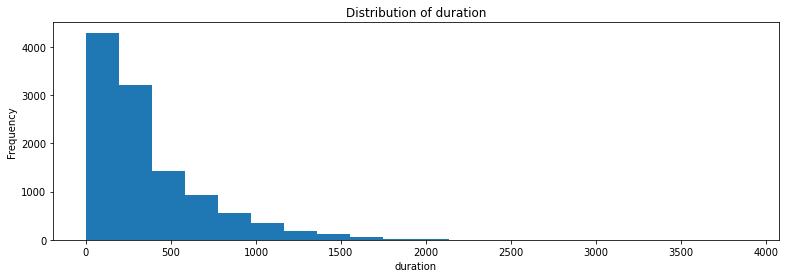

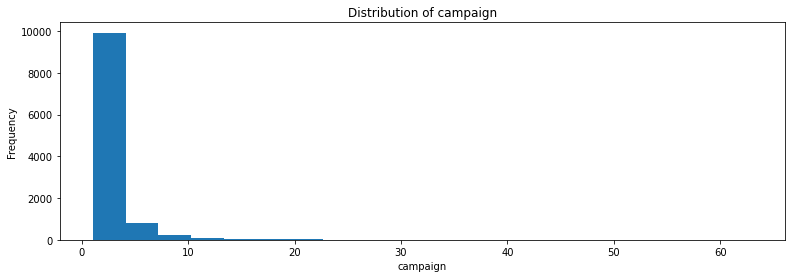

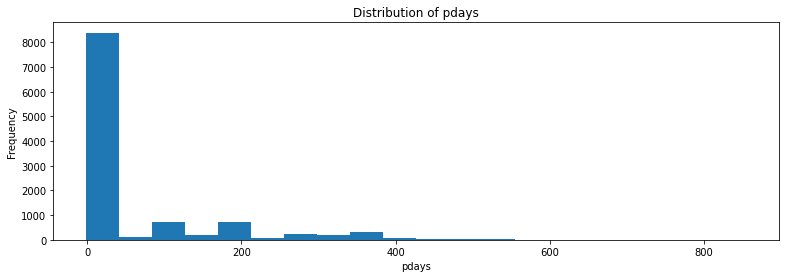

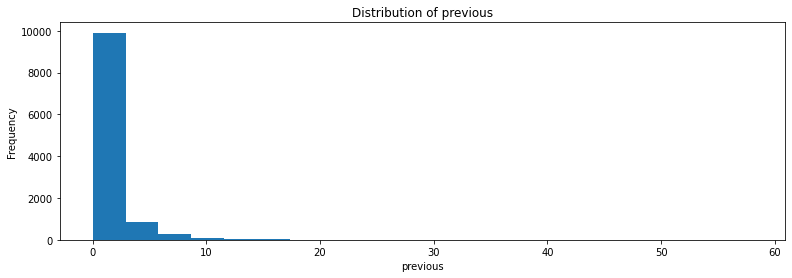

In [16]:
for i in numerical_features:
    plt.figure(figsize=(13,4))
    plt.hist(df[i], bins=20) # bins=20 argument specifies that the histogram should be divided into 20 bins
    plt.title('Distribution of ' +i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

**Bar Plots**
comparing each numerical feature against the deposit

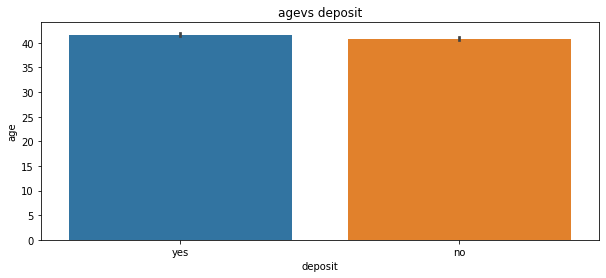

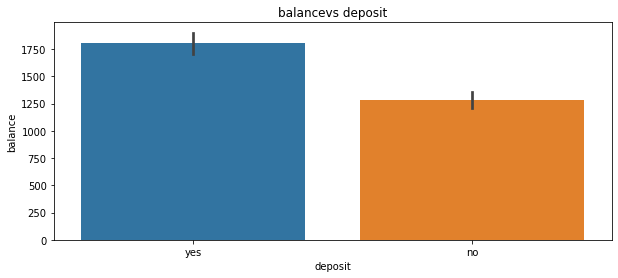

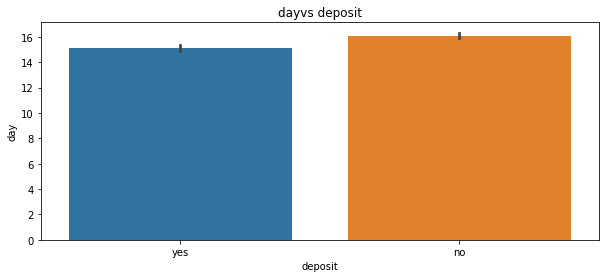

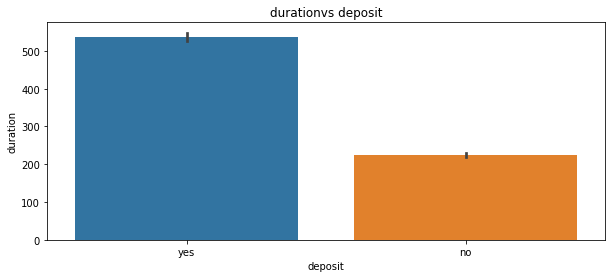

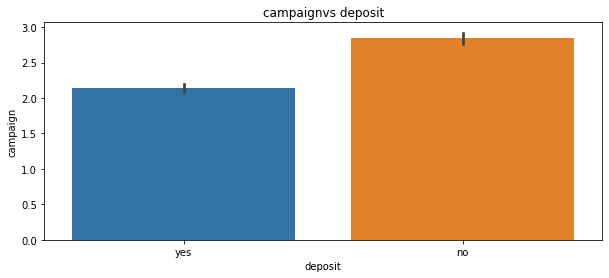

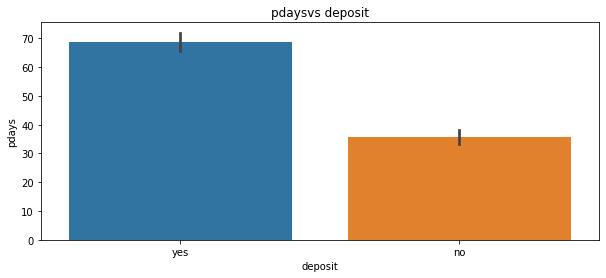

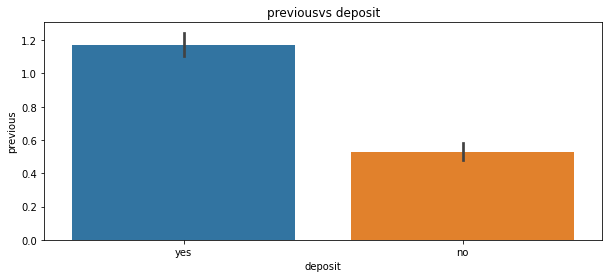

In [26]:
for i in numerical_features:
    plt.figure(figsize=(10,4))
    sns.barplot(x='deposit', y=i, data=df)
    plt.title(i+ 'vs deposit')
    plt.show()